# Exercici 2

> ## Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

In [33]:
#Importamos las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Cargamos el archivo "movies.dat" en un nuevo dataframe
df_mov = pd.read_csv('C:\\Users\\USER\\Desktop\\Data Science\\Sprint 4. Visualització gràfica de dades\\Tasca M4 T02\\movies.dat', sep ='::', encoding = 'ISO-8859-1', engine='python', names = ['Movie_id', 'Title', 'Genre'], index_col='Movie_id')
df_mov.head(10)

,Title,Genre
Movie_id,,
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller
7,Sabrina (1995),Comedy|Romance
8,Tom and Huck (1995),Adventure|Children's
9,Sudden Death (1995),Action


In [35]:
# Vemos número de filas y columnas del dataframe
df_mov.shape

(3883, 2)

In [36]:
df_mov.columns

Index(['Title', 'Genre'], dtype='object')

In [37]:
df_mov.Genre.unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", 'Action|Drama|Thriller',
       "Children's|Comedy", 'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventur

In [38]:
df_mov.Genre.nunique()

301

> Podemos comprobar que tenemos actualmente 301 géneros (o combinaciones de géneros) únicos.

In [39]:
# Vemos la información estadística del dataframe
df_mov.describe()

,Title,Genre
count,3883,3883
unique,3883,301
top,Toy Story (1995),Drama
freq,1,843


In [40]:
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3883 non-null   object
 1   Genre   3883 non-null   object
dtypes: object(2)
memory usage: 91.0+ KB


In [41]:
# En el caso de que la película esté asociada a varios géneros, nos quedamos con el primero
df_mov['Genre'] = df_mov.Genre.str.split("|").str[0].str.strip() 
df_mov.head(10)

,Title,Genre
Movie_id,,
1,Toy Story (1995),Animation
2,Jumanji (1995),Adventure
3,Grumpier Old Men (1995),Comedy
4,Waiting to Exhale (1995),Comedy
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action
7,Sabrina (1995),Comedy
8,Tom and Huck (1995),Adventure
9,Sudden Death (1995),Action


In [42]:
df_mov.Genre.nunique()

18

> Al elegir un género por película, reducimos el número de géneros a 18

In [43]:
# Extraemos el año del campo "Title" y creamos una nueva columna "Year"
df_mov['Year'] = df_mov.Title.str.slice(-5,-1)
df_mov['Title'] = df_mov.Title.str.slice(0,-6)
df_mov.head(10)

,Title,Genre,Year
Movie_id,,,
1,Toy Story,Animation,1995
2,Jumanji,Adventure,1995
3,Grumpier Old Men,Comedy,1995
4,Waiting to Exhale,Comedy,1995
5,Father of the Bride Part II,Comedy,1995
6,Heat,Action,1995
7,Sabrina,Comedy,1995
8,Tom and Huck,Adventure,1995
9,Sudden Death,Action,1995


In [44]:
#Vemos el tipo de la nueva columna
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3883 non-null   object
 1   Genre   3883 non-null   object
 2   Year    3883 non-null   object
dtypes: object(3)
memory usage: 121.3+ KB


In [45]:
# Convertimos 'Year' de tipo objeto a tipo int para poder utilizarla mejor en la gestión de las gráficas
df_mov['Year'] = df_mov.Year.astype(int)
df_mov.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3883 entries, 1 to 3952
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3883 non-null   object
 1   Genre   3883 non-null   object
 2   Year    3883 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 106.2+ KB


# Exercici 3

> ## Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?
> ## Fes una o dues representacions gràfiques i justifica la teva elecció.

> En este caso tenemos 2 variables categóricas y una variable numérica. Parece que las representaciones gráficas más ilustrativas sería mostrar la distribución de películas por cada uno de los géneros, la de películas por año y una gráfica donde podemos ver la distribución de los diferentes géneros en número de películas por cada año.

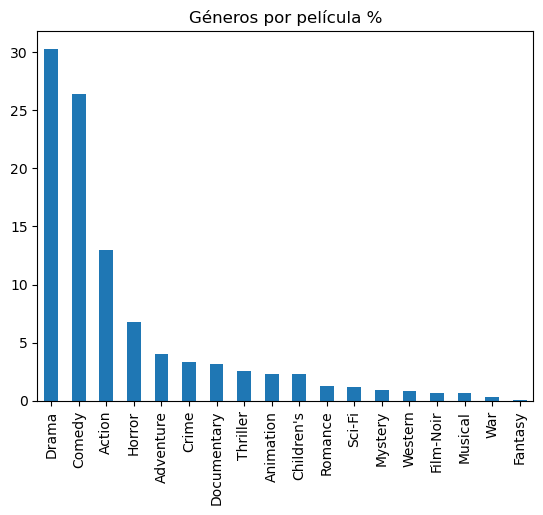

In [17]:
# Vemos las películas por género en %
plot = (100 * df_mov['Genre'].value_counts() / len(df_mov['Title'])).plot(
kind='bar', title='Géneros por película %')

> Podemos comprobar que casi el 60% de las películas se reparten entre el drama y la comedia, pero hay que tener en cuenta que alguna de las películas tenía asignados 2 o 3 géneros y sólo nos hemos quedado con uno, por lo que el resultado de este gráfico esta condicionado por este hecho.

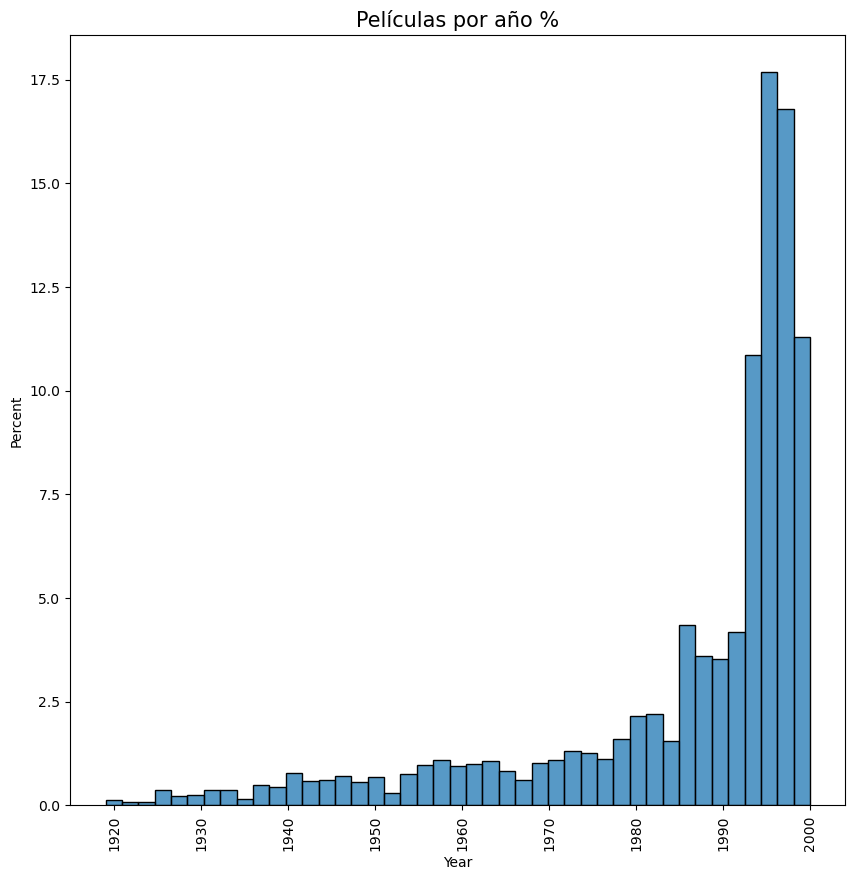

<Figure size 640x480 with 0 Axes>

In [48]:
#Vemos la distribución de películas por año en %
plt.figure(figsize=(10,10))
sns.histplot(x='Year', stat="percent",data=df_mov, edgecolor="black")
plt.xticks(rotation=90);
plt.title('Películas por año %', fontsize=15)
plt.show()

> Si analizamos en % las películas realizadas en cada año, podemos comprobar que es a partir de 1986 cuando se incrementa el número de producciones, siendo el año 1996 el más prolífico con el 17,5% del total de todas las películas.

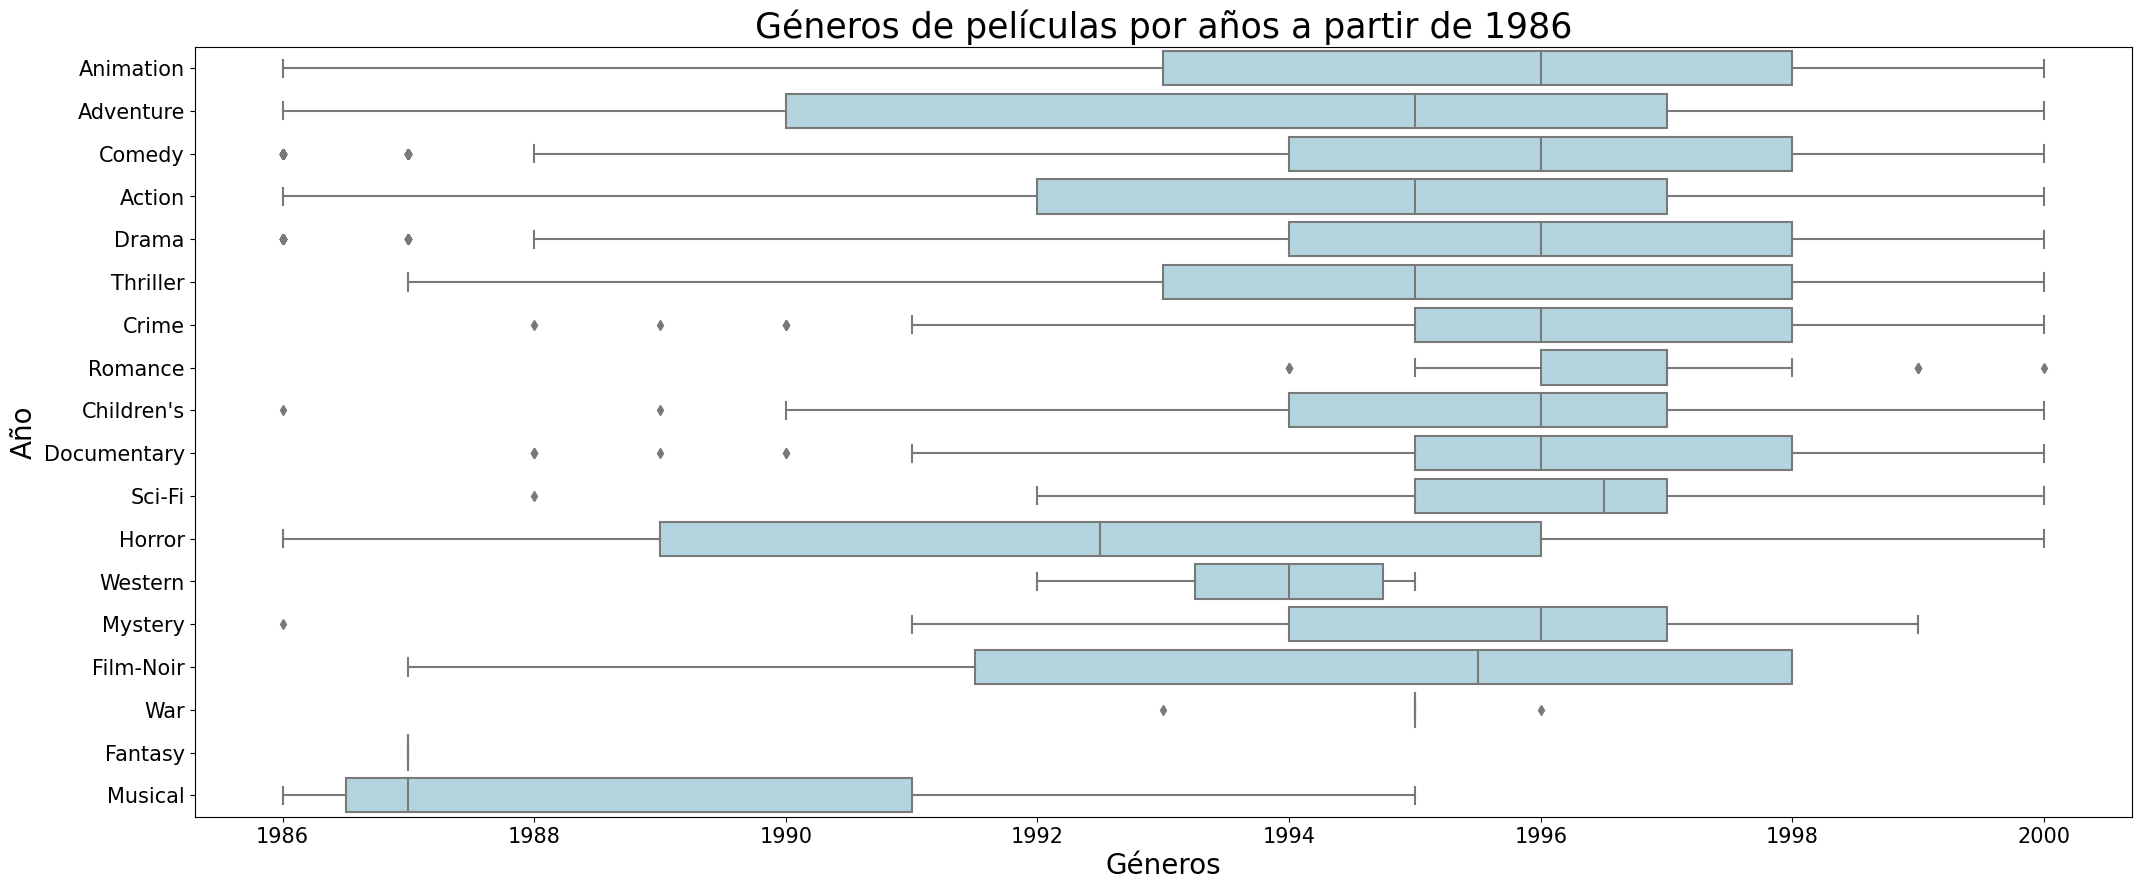

In [50]:
plt.figure(figsize=(25,10))
g=sns.boxplot(x='Year', y='Genre', data=df_mov.loc[df_mov.Year >= 1986], color= "lightblue")
g.set_title('Géneros de películas por años a partir de 1986', fontsize=25)
g.set_xlabel('Géneros',fontsize=20)
g.set_ylabel('Año', fontsize=20)
g.tick_params(labelsize=15)

> Si ponemos el foco en las películas realizadas a partir de 1986, podemos ver que hay bastante igualdad entre varios de los géneros, pudiendo afirmar que existen géneros que se han realizado y se realizan desde los primeros tiempos del cine hasta la actualidad. Otros géneros tienen tiempos de vida cortos o es posible que respondan a "modas". Por destacar alguno, me llama la atención el género "Musical" que parece termina su vida a partir de 1991, pero que fue mayoritario entre 1987 y 1989.  También el género "Film-Noir" desaparece literalmente a partir de 1998. En todo caso en este gráfico es válido el comentario indicado en el primero de la sesga que implica el elegir uno de los géneros por cada película.